In [5]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical

train = pd.read_csv('C:/Users/meeta/Desktop/TSWE2019/sign-language-recognition/dataset/sign_mnist_train.csv', header = 0)
test = pd.read_csv('C:/Users/meeta/Desktop/TSWE2019/sign-language-recognition/dataset/sign_mnist_test.csv', header = 0)

def getProcessedData(train, test):
    
    y_train = train['label'].values
    y_test = test['label'].values

    x_train = train.drop(['label'],axis=1)
    x_test = test.drop(['label'], axis=1)

    x_train = np.array(x_train.iloc[:,:])
    x_train = np.array([np.reshape(i, (28, 28)) for i in x_train])

    x_test = np.array(x_test.iloc[:,:])
    x_test = np.array([np.reshape(i, (28, 28)) for i in x_test])
    
    return normalizeData(x_train, x_test, y_train, y_test)

In [6]:
def normalizeData(x_train, x_test, y_train, y_test):
    x_train = x_train/255
    x_test = x_test/255
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    
    return x_train, x_test, y_train, y_test

In [7]:
x_train, x_test, y_train, y_test = getProcessedData(train, test)

In [8]:
print('Training examples:',x_train.shape[0])
print('Test examples:',x_test.shape[0])

print('X_train shape"',x_train.shape)
print('y_train shape"',y_train.shape)
print('X_test shape"',x_test.shape)
print('y_test shape"',y_test.shape)

x_train = x_train.reshape((27455, 28, 28, 1))
x_test = x_test.reshape((7172, 28, 28, 1))

print(x_train.shape)
print(y_train.shape)

Training examples: 27455
Test examples: 7172
X_train shape" (27455, 28, 28)
y_train shape" (27455, 25)
X_test shape" (7172, 28, 28)
y_test shape" (7172, 25)
(27455, 28, 28, 1)
(27455, 25)


In [9]:
from keras.models import Sequential
from keras.layers import Convolution2D as Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import pydot

In [10]:
def generateModel():    
    model = Sequential()
    model.add(Conv2D(filters = 32,kernel_size = (3,3),input_shape = (28,28,1),activation = 'relu',padding = 'same'))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(64,activation = 'relu'))
    model.add(Dense(25,activation = 'softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
classifier = generateModel()

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                200768    
__________

In [13]:
y_train[0].shape

(25,)

In [14]:
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir = 'logs/SLR classifier')

In [15]:
classifier.fit(x_train, y_train, batch_size = 100, epochs = 3, callbacks = [tensorboard])

Instructions for updating:
Use tf.cast instead.
Epoch 1/4
27455/27455 [==============================] - 38s 1ms/step - loss: 1.6579 - acc: 0.4913
Epoch 2/4
27455/27455 [==============================] - 38s 1ms/step - loss: 0.2671 - acc: 0.9178
Epoch 3/4
 8400/27455 [========>.....................] - ETA: 26s - loss: 0.0828 - acc: 0.9810

KeyboardInterrupt: 

In [9]:
# from sklearn.externals import joblib
# joblib.dump(classifier, 'saved_classifier.pkl')

In [16]:
import matplotlib.pyplot as plt

In [17]:
def getLabel(LOC):
    lbl = y_test[LOC]
    return list(lbl).index(1)

Label: 4


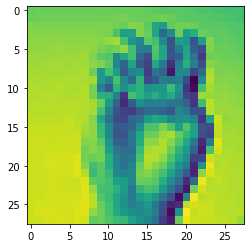

In [18]:
LOC = 15
print('Label:', getLabel(LOC))
image = x_test[LOC]
plt.imshow(image.reshape((28,28)))

In [19]:
image = image.reshape((1,28,28,1))
res = classifier.predict(image)
res = list(res[0])
mx = max(res)
print('Prediction:',res.index(mx))

Prediction: 4
